In [20]:
# import libraries

import ssl
import certifi
from ucimlrepo import fetch_ucirepo 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

In [12]:
# configure certs

context = ssl.create_default_context(cafile=certifi.where())

In [21]:

diabetes_data = fetch_ucirepo(id=891)

X = diabetes_data.data.features 
y = diabetes_data.data.targets

df = pd.DataFrame(X, columns=diabetes_data.variables['name'])
df['Diabetes_binary'] = y
df['ID'] = diabetes_data.data.ids
df.head(3)


name,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8


In [22]:
# add age descriptions

age_label = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or order']

age_mapping = {i: label for i, label in enumerate(age_label, start=1)}

# Map the numeric keys to descriptive labels
df['Age_Group'] = df['Age'].map(age_mapping)


In [29]:
# add income distribution

df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

income_label = [
    'Less than $10,000', 'Less than $15,000', 'Less than $20,000', 
    'Less than $25,000', 'Less than $35,000', 'Less than $50,000', 
    'Less than $75,000', '$75,000 or more'
]
income_mapping = {i: label for i, label in enumerate(income_label, start=1)}

df['Income_Group'] = df['Income'].map(income_mapping)


In [40]:
# add education distribution

df['Education'] = pd.to_numeric(df['Education'], errors='coerce')

education_label = [
    'Kindergarten or None', 'Elementary', 'Some High School', 
    'High School Graduate', 'Some College or Technical School', 'College Graduate', 
]
education_mapping = {i: label for i, label in enumerate(education_label, start=1)}

df['Education_Group'] = df['Education'].map(education_mapping)

df.head(3)

name,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Age_Group,Income_Group,Education_Group
0,0,0,1,1,1,40,1,0,0,0,...,18,15,1,0,9,4,3,60-64,"Less than $20,000",High School Graduate
1,1,0,0,0,0,25,1,0,0,1,...,0,0,0,0,7,6,1,50-54,"Less than $10,000",College Graduate
2,2,0,1,1,1,28,0,0,0,0,...,30,30,1,0,9,4,8,60-64,"$75,000 or more",High School Graduate


#### eda plots

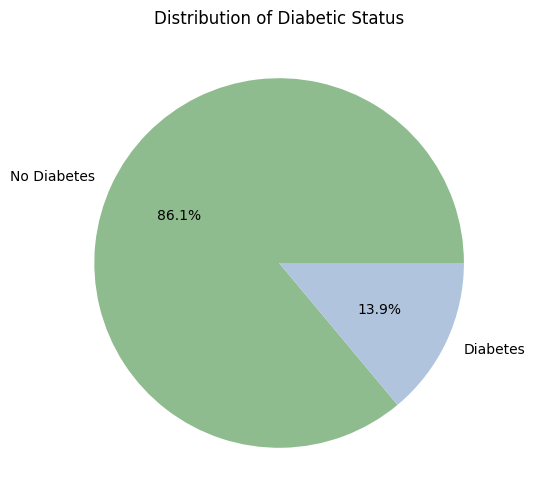

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

In [ ]:
diabetic_counts = df['Diabetes_binary'].value_counts()

plt.figure(figsize=(8, 6))
diabetic_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Diabetes', 'Diabetes'], colors=['darkseagreen', 'lightsteelblue'])
plt.title('Distribution of Diabetic Status')
plt.ylabel('')
plt.show()

diabetic_counts

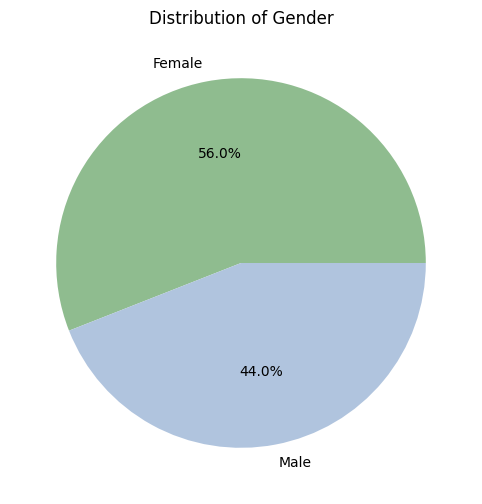

Sex
0    141974
1    111706
Name: count, dtype: int64

In [28]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'], colors=['darkseagreen', 'lightsteelblue'])
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()

gender_counts

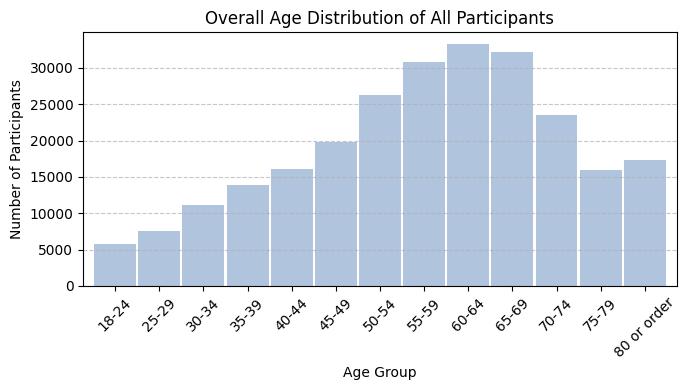

In [36]:
# plot age distribution

plt.figure(figsize=(7, 4))

df['Age_Group'].value_counts().sort_index().plot(kind='bar', color='lightsteelblue',width=0.95)

plt.title('Overall Age Distribution of All Participants')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)  # Rotates labels so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



In [57]:
age_counts = df['Age_Group'].value_counts()
age_counts.sort_index()

Age_Group
18-24           5700
25-29           7598
30-34          11123
35-39          13823
40-44          16157
45-49          19819
50-54          26314
55-59          30832
60-64          33244
65-69          32194
70-74          23533
75-79          15980
80 or order    17363
Name: count, dtype: int64

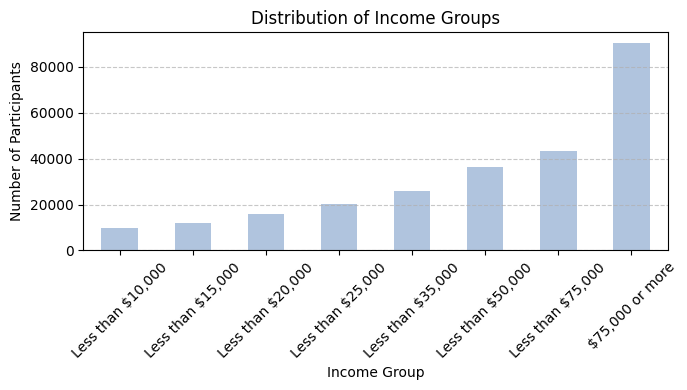

In [113]:
# plot income distribution

plt.figure(figsize=(7,4))
counts = df['Income_Group'].value_counts().reindex(income_label, fill_value=0)

counts.plot(kind='bar', color='lightsteelblue')
plt.title('Distribution of Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)  # Rotates labels so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [103]:
income_counts = df['Income_Group'].value_counts()
income_counts.sort_index()

Income_Group
$75,000 or more      90385
Less than $10,000     9811
Less than $15,000    11783
Less than $20,000    15994
Less than $25,000    20135
Less than $35,000    25883
Less than $50,000    36470
Less than $75,000    43219
Name: count, dtype: int64

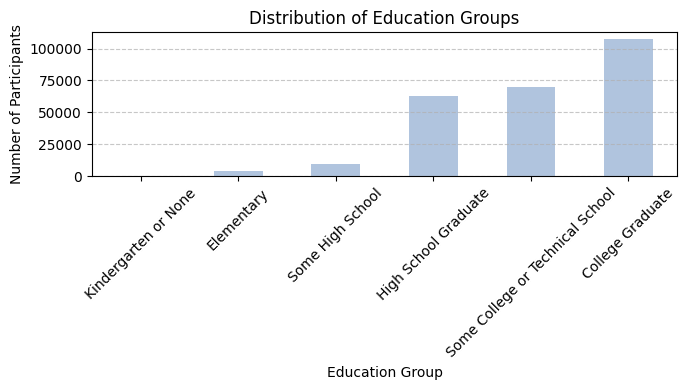

In [114]:
# plot education distribution

plt.figure(figsize=(7,4))
counts = df['Education_Group'].value_counts().reindex(education_label, fill_value=0)

counts.plot(kind='bar', color='lightsteelblue')
plt.title('Distribution of Education Groups')
plt.xlabel('Education Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)  # Rotates labels so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [112]:
education_counts = df['Education_Group'].value_counts()
education_counts.sort_index()

Education_Group
College Graduate                    107325
Elementary                            4043
High School Graduate                 62750
Kindergarten or None                   174
Some College or Technical School     69910
Some High School                      9478
Name: count, dtype: int64

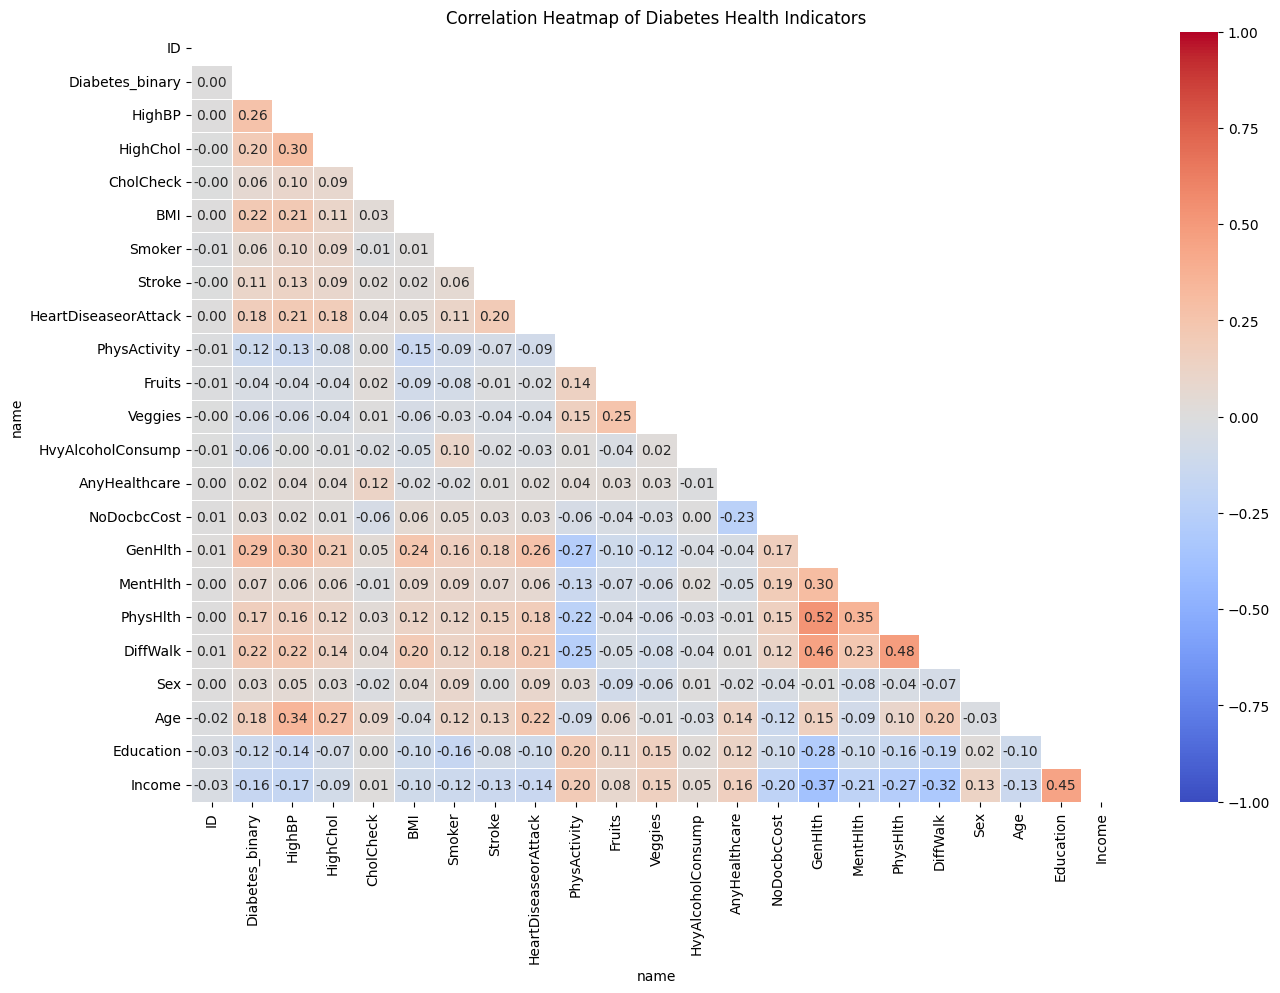

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the correlation matrix
corr_matrix = df.corr()

# 2. (Optional) Create a mask to hide the upper triangle (it's a mirror image)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 3. Set up the figure size
plt.figure(figsize=(15, 10))

# 4. Plot the heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask,           # Hides redundant upper triangle
    annot=True,          # Shows the correlation coefficient numbers
    fmt=".2f",           # Limits decimals to 2 places
    cmap='coolwarm',     # Red for positive, blue for negative correlation
    linewidths=0.5,      # Adds thin lines between squares for clarity
    vmin=-1, vmax=1,     # Anchors the color scale from -1 to 1
    center=0             # Ensures 0 correlation is the neutral color
)

plt.title('Correlation Heatmap of Diabetes Health Indicators')
plt.show()

/var/folders/qz/mv_4p68n4lb9prgykyswxzdr0000gn/T/ipykernel_86861/669070381.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


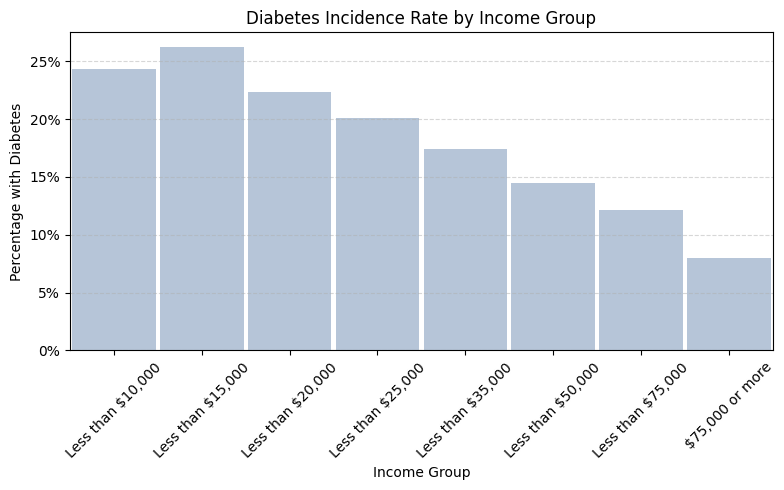

In [46]:

plt.figure(figsize=(8, 5))

# Calculating the mean of Diabetes_binary effectively gives you the % of cases
# since 1 = Diabetes and 0 = No Diabetes.
sns.barplot(
    data=df, 
    x='Income_Group', 
    y='Diabetes_binary', 
    order=income_label, 
    color='lightsteelblue',
    width=0.95,
    errorbar=None  # Removes confidence interval lines for a cleaner look
)

# Convert y-axis to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

plt.title('Diabetes Incidence Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

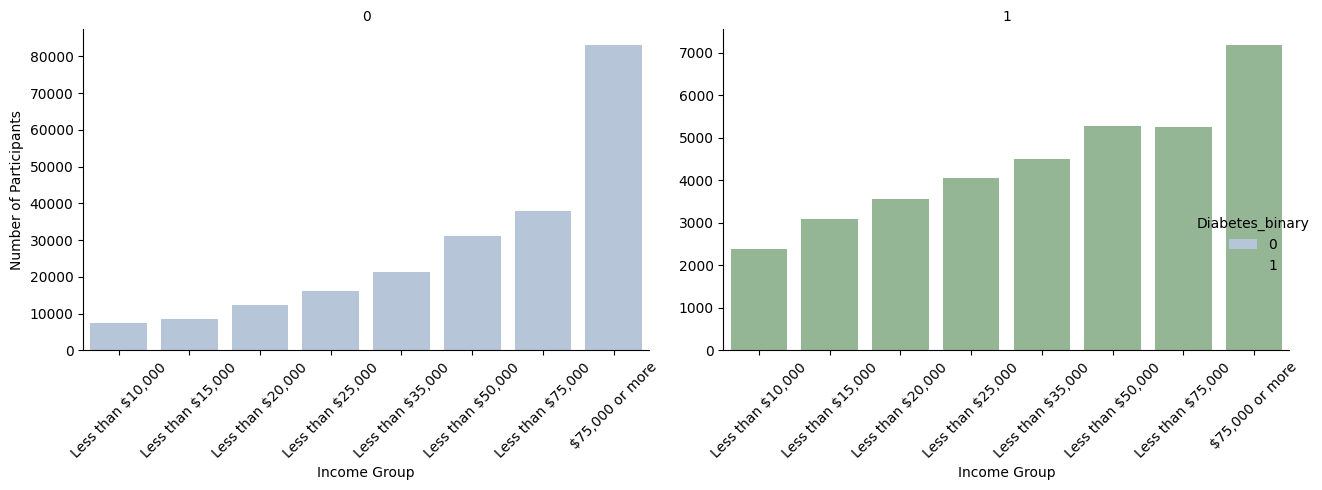

In [35]:
# Create a faceted histogram/countplot
g = sns.catplot(
    data=df, 
    x='Income_Group', 
    col='Diabetes_binary', 
    kind='count', 
    sharey=False,      # THIS IS THE KEY: Each plot gets its own Y-axis scale
    order=income_label,
    palette=['lightsteelblue', 'darkseagreen'],
    hue='Diabetes_binary',
    height=5, 
    aspect=1.2
)

g.set_xticklabels(rotation=45)
g.set_titles("{col_name}") # Labels plots as 0 (Healthy) and 1 (Diabetic)
g.set_axis_labels("Income Group", "Number of Participants")

plt.tight_layout()
plt.show()

/var/folders/qz/mv_4p68n4lb9prgykyswxzdr0000gn/T/ipykernel_86861/3619480511.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


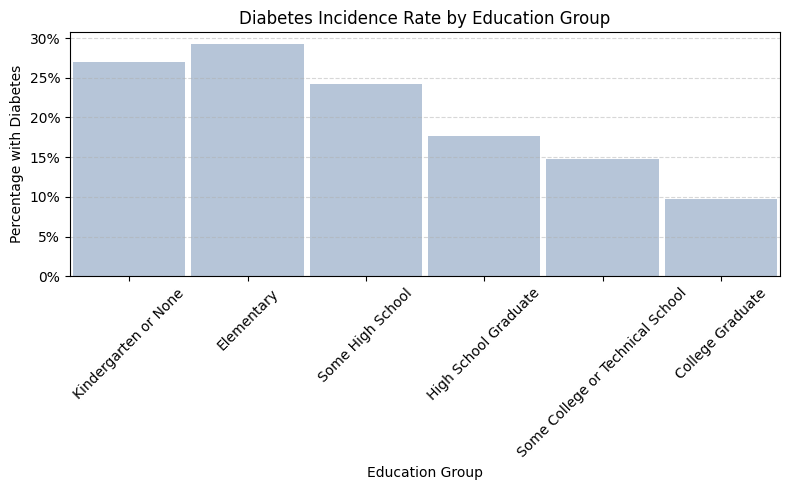

In [47]:

plt.figure(figsize=(8, 5))

# Calculating the mean of Diabetes_binary effectively gives you the % of cases
# since 1 = Diabetes and 0 = No Diabetes.
sns.barplot(
    data=df, 
    x='Education_Group', 
    y='Diabetes_binary', 
    order=education_label, 
    color='lightsteelblue',
    width=0.95,
    errorbar=None  # Removes confidence interval lines for a cleaner look
)

# Convert y-axis to percentage
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])

plt.title('Diabetes Incidence Rate by Education Group')
plt.xlabel('Education Group')
plt.ylabel('Percentage with Diabetes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

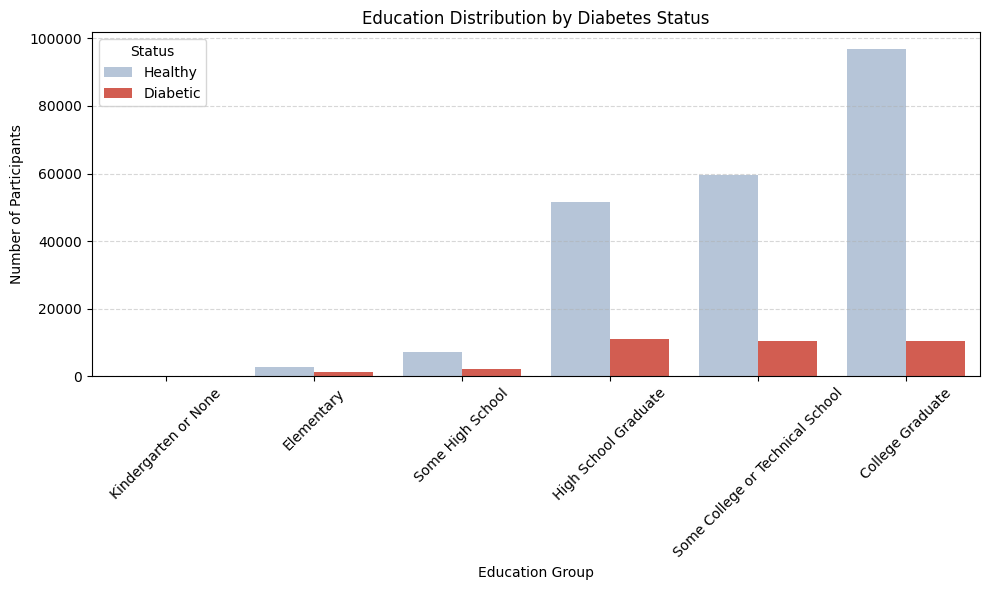

In [18]:

plt.figure(figsize=(10, 6))

# use 'hue' to split each income group by diabetes status
sns.countplot(
    data=df, 
    x='Education_Group', 
    hue='Diabetes_binary', 
    order=education_label,      # Keeps your specific order
    palette=['lightsteelblue', '#e74c3c'] # Blue for 0, Red for 1
)

plt.title('Education Distribution by Diabetes Status')
plt.xlabel('Education Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Status', labels=['Healthy', 'Diabetic'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### xgboost

In [8]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/Users/estw314/Documents/EstherFiles/mdm/m228-final-project/.venv/lib/python3.12/site-packages/xgboost/training.py:200: UserWarning: [17:13:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 